<a href="https://colab.research.google.com/github/KattaLasya/PythonforDataScience/blob/main/ghpg1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Supervised

LOADING DATASET

Dataset loaded successfully from: /content/Greenhouse Plant Growth Metrics.csv

DATASET OVERVIEW

Dataset Shape: (30000, 14)

Column Names:
['Random', 'ACHP', 'PHR', 'AWWGV', 'ALAP', 'ANPL', 'ARD', 'ADWR', 'PDMVG', 'ARL', 'AWWR', 'ADWV', 'PDMRG', 'Class']

First 5 rows:
  Random       ACHP        PHR     AWWGV         ALAP      ANPL        ARD  \
0     R1  34.533468  54.566983  1.147449  1284.229549  4.999713  16.274918   
1     R1  34.489028  54.567692  1.149530  1284.247744  5.024259  16.269452   
2     R2  33.100405  67.067344  1.104647  1009.208996  5.007652  15.980760   
3     R1  34.498319  54.559049  1.137759  1284.227623  4.991501  16.276710   
4     R3  36.297008  45.588894  1.363205   981.470310  4.003682  16.979894   

       ADWR      PDMVG        ARL      AWWR      ADWV      PDMRG Class  
0  1.706810  18.399982  19.739037  2.949240  0.209251  57.633906    SA  
1  1.700930  18.398289  19.758836  2.943137  0.216154  57.633697    SA  
2  1.185391  19.398789  

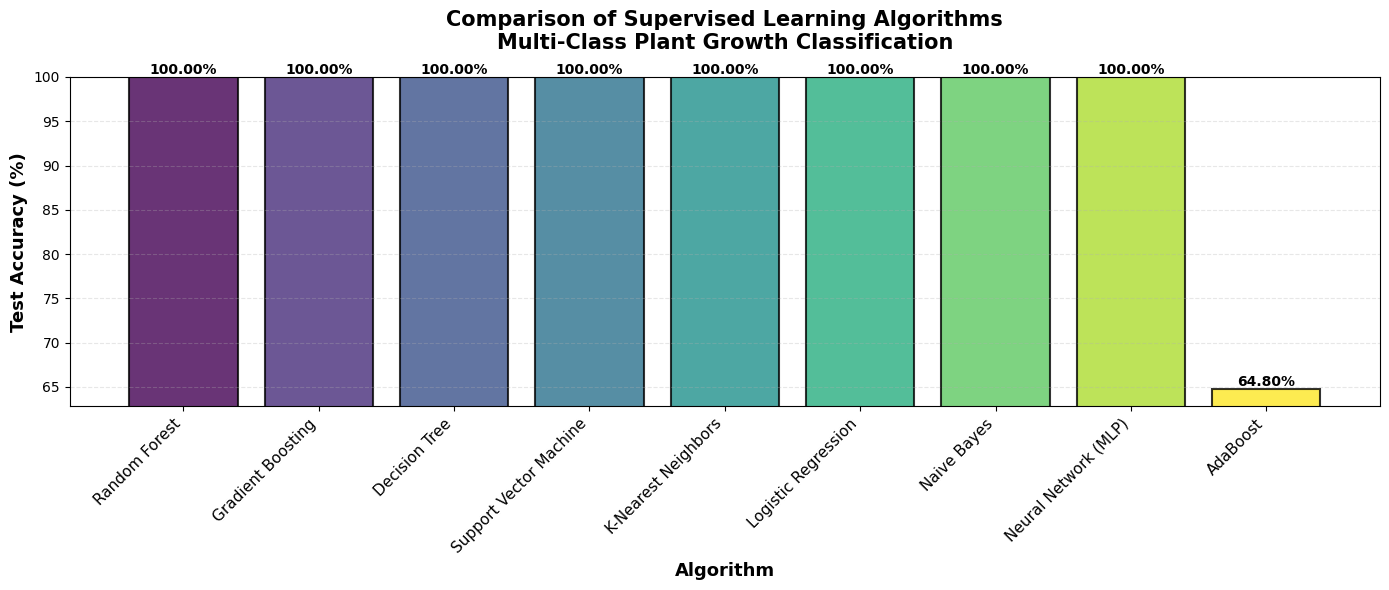

✓ Saved: algorithm_comparison.png


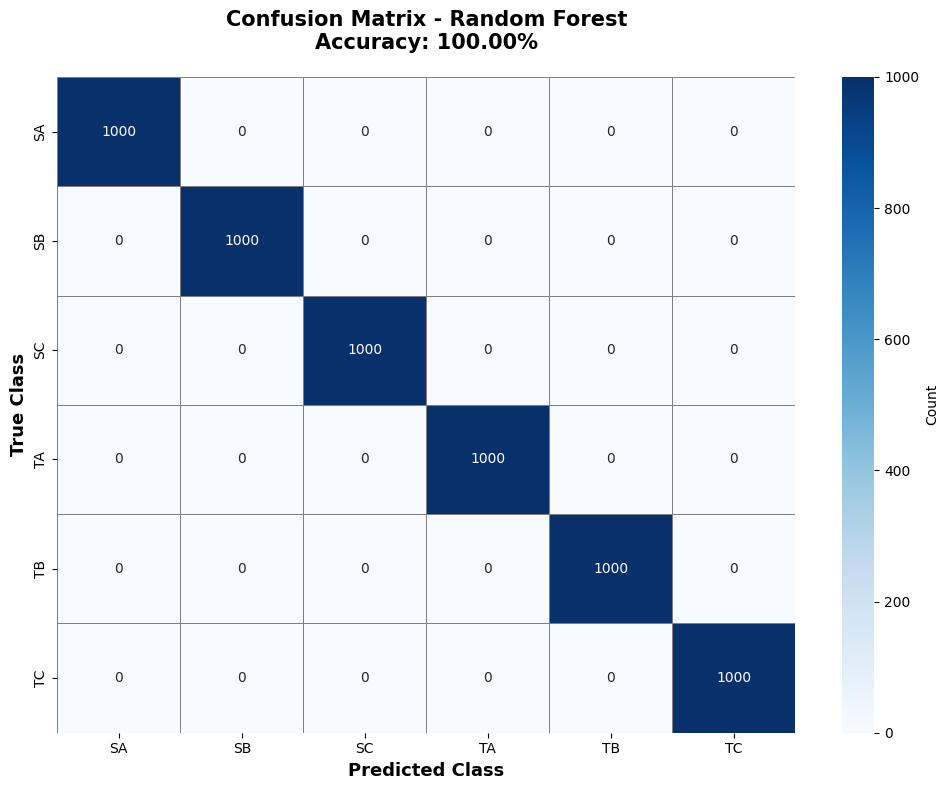

✓ Saved: confusion_matrix_best.png


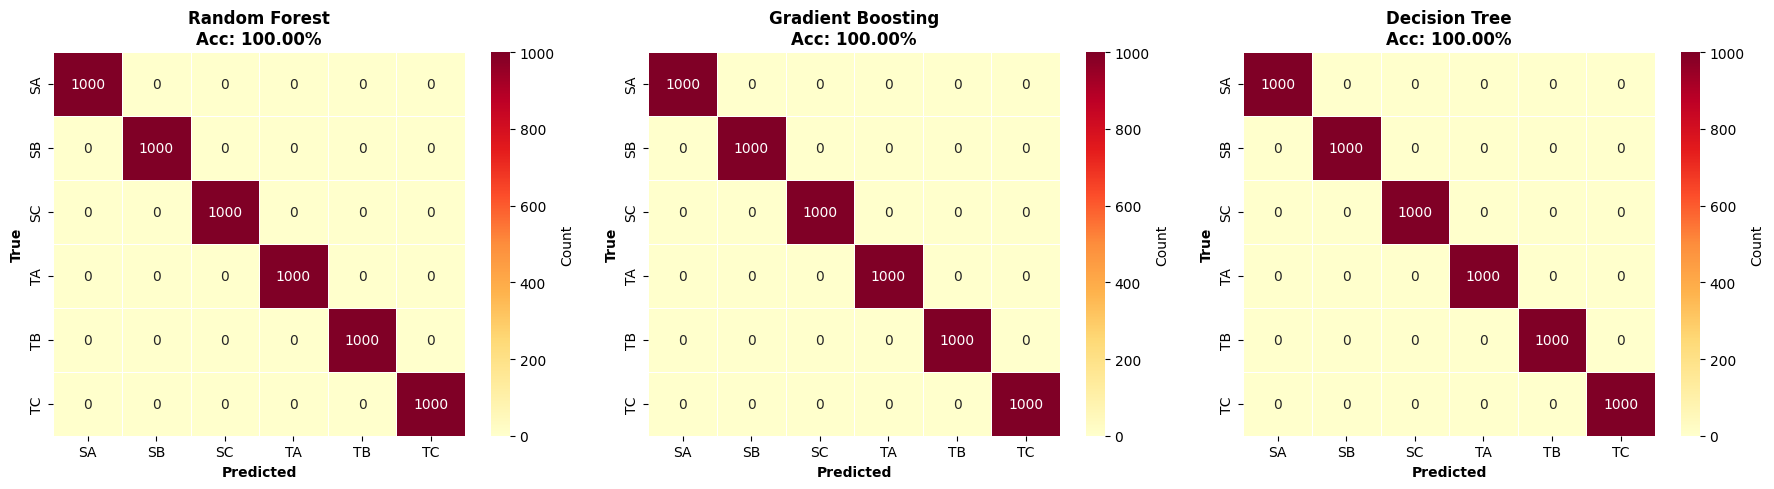

✓ Saved: top3_confusion_matrices.png


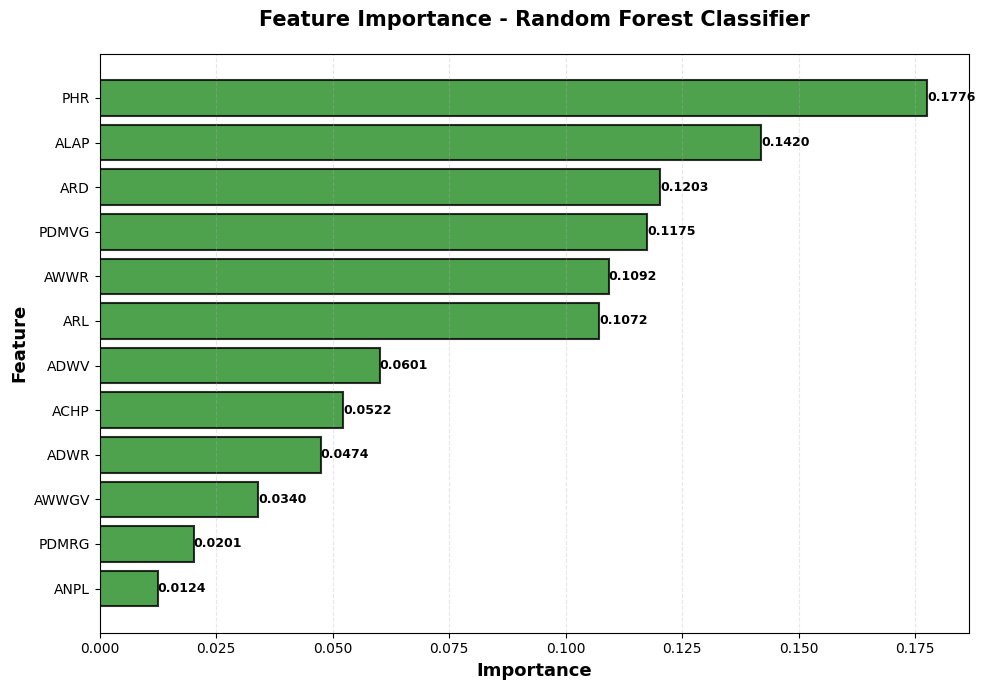

✓ Saved: feature_importance.png
✓ Feature importance saved to: feature_importance.csv


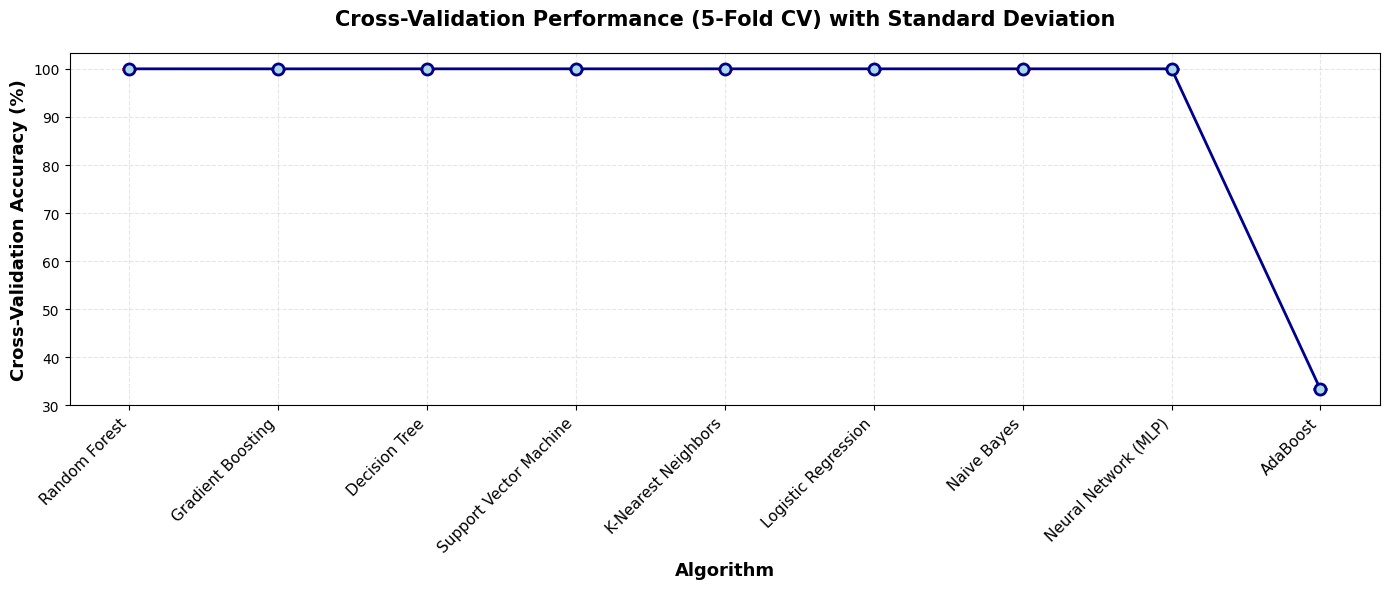

✓ Saved: cv_scores_comparison.png

ANALYSIS COMPLETE!

Best Performing Algorithm: Random Forest
Best Test Accuracy: 100.00%
Best CV Accuracy: 100.00% (+/- 0.00%)

FILES GENERATED:
1. algorithm_results_summary.csv
2. algorithm_comparison.png
3. confusion_matrix_best.png
4. top3_confusion_matrices.png
5. feature_importance.png
6. feature_importance.csv
7. cv_scores_comparison.png

You can download these files from Colab's file browser (left sidebar)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# ============================================================================
# STEP 1: Load Dataset
# ============================================================================
print("="*80)
print("LOADING DATASET")
print("="*80)

# Load the dataset
DATA = "/content/Greenhouse Plant Growth Metrics.csv"
df = pd.read_csv(DATA)
print(f"\nDataset loaded successfully from: {DATA}")

print("\n" + "="*80)
print("DATASET OVERVIEW")
print("="*80)
print(f"\nDataset Shape: {df.shape}")
print(f"\nColumn Names:\n{df.columns.tolist()}")
print(f"\nFirst 5 rows:\n{df.head()}")
print(f"\nDataset Info:")
print(df.info())
print(f"\nClass Distribution:\n{df['Class'].value_counts()}")
print(f"\nBasic Statistics:\n{df.describe()}")

# Check for missing values
print(f"\nMissing Values:\n{df.isnull().sum()}")

# ============================================================================
# STEP 2: Data Preprocessing
# ============================================================================
print("\n" + "="*80)
print("DATA PREPROCESSING")
print("="*80)

# Separate features and target
# Remove 'Random' and 'Class' columns for features
X = df.drop(['Random', 'Class'], axis=1)
y = df['Class']

print(f"\nFeatures selected: {X.columns.tolist()}")
print(f"Target variable: Class")
print(f"Classes: {y.unique()}")

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print(f"\nClass Encoding:")
for i, class_name in enumerate(le.classes_):
    print(f"  {class_name} -> {i}")

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Number of features: {X_train.shape[1]}")
print(f"Number of classes: {len(np.unique(y_encoded))}")

# ============================================================================
# STEP 3: Train Multiple Supervised Learning Algorithms
# ============================================================================
print("\n" + "="*80)
print("TRAINING SUPERVISED LEARNING ALGORITHMS")
print("="*80)

# Define classifiers with optimized hyperparameters
classifiers = {
    'Random Forest': RandomForestClassifier(
        n_estimators=200,
        max_depth=20,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=150,
        max_depth=8,
        learning_rate=0.1,
        random_state=42
    ),
    'Decision Tree': DecisionTreeClassifier(
        max_depth=15,
        min_samples_split=10,
        min_samples_leaf=4,
        random_state=42
    ),
    'Support Vector Machine': SVC(
        kernel='rbf',
        C=10,
        gamma='scale',
        random_state=42
    ),
    'K-Nearest Neighbors': KNeighborsClassifier(
        n_neighbors=7,
        weights='distance',
        metric='minkowski'
    ),
    'Logistic Regression': LogisticRegression(
        max_iter=1000,
        C=1.0,
        random_state=42,
        multi_class='multinomial',
        solver='lbfgs'
    ),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(
        n_estimators=100,
        learning_rate=1.0,
        random_state=42
    ),
    'Neural Network (MLP)': MLPClassifier(
        hidden_layer_sizes=(128, 64, 32),
        max_iter=500,
        activation='relu',
        solver='adam',
        random_state=42
    )
}

results = {}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    print(f"\n{'-'*80}")
    print(f"Training {name}...")
    print(f"{'-'*80}")

    # Train
    clf.fit(X_train_scaled, y_train)

    # Predict
    y_pred = clf.predict(X_test_scaled)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)

    # Cross-validation score (5-fold)
    cv_scores = cross_val_score(clf, X_train_scaled, y_train, cv=5)

    results[name] = {
        'accuracy': accuracy,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'y_pred': y_pred,
        'model': clf
    }

    print(f"\nTest Accuracy: {accuracy*100:.2f}%")
    print(f"Cross-Validation Accuracy: {cv_scores.mean()*100:.2f}% (+/- {cv_scores.std()*100:.2f}%)")

    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion Matrix:")
    print(cm)

# ============================================================================
# STEP 4: Summary of Results
# ============================================================================
print("\n" + "="*80)
print("SUMMARY OF ALL ALGORITHMS")
print("="*80)

summary_df = pd.DataFrame({
    'Algorithm': list(results.keys()),
    'Test Accuracy (%)': [results[k]['accuracy']*100 for k in results.keys()],
    'CV Mean Accuracy (%)': [results[k]['cv_mean']*100 for k in results.keys()],
    'CV Std (%)': [results[k]['cv_std']*100 for k in results.keys()]
})

summary_df = summary_df.sort_values('Test Accuracy (%)', ascending=False)
print("\n", summary_df.to_string(index=False))

# Save summary to CSV
summary_df.to_csv('algorithm_results_summary.csv', index=False)
print("\n✓ Results saved to: algorithm_results_summary.csv")

# ============================================================================
# STEP 5: Visualizations
# ============================================================================
print("\n" + "="*80)
print("GENERATING VISUALIZATIONS")
print("="*80)

# 1. Accuracy Comparison Bar Plot
plt.figure(figsize=(14, 6))
algorithms = summary_df['Algorithm']
accuracies = summary_df['Test Accuracy (%)']
colors = plt.cm.viridis(np.linspace(0, 1, len(algorithms)))

bars = plt.bar(algorithms, accuracies, color=colors, edgecolor='black', alpha=0.8, linewidth=1.5)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel('Algorithm', fontsize=13, fontweight='bold')
plt.ylabel('Test Accuracy (%)', fontsize=13, fontweight='bold')
plt.title('Comparison of Supervised Learning Algorithms\nMulti-Class Plant Growth Classification',
          fontsize=15, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.ylim([min(accuracies)-2, 100])
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('algorithm_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: algorithm_comparison.png")

# 2. Confusion Matrix for Best Classifier
best_algo = summary_df.iloc[0]['Algorithm']
best_pred = results[best_algo]['y_pred']

plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, best_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_,
            cbar_kws={'label': 'Count'}, linewidths=0.5, linecolor='gray')
plt.xlabel('Predicted Class', fontsize=13, fontweight='bold')
plt.ylabel('True Class', fontsize=13, fontweight='bold')
plt.title(f'Confusion Matrix - {best_algo}\nAccuracy: {results[best_algo]["accuracy"]*100:.2f}%',
          fontsize=15, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('confusion_matrix_best.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: confusion_matrix_best.png")

# 3. Confusion Matrix for All Top 3 Algorithms
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
top_3_algos = summary_df.head(3)['Algorithm'].tolist()

for idx, algo in enumerate(top_3_algos):
    cm = confusion_matrix(y_test, results[algo]['y_pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd', ax=axes[idx],
                xticklabels=le.classes_, yticklabels=le.classes_,
                cbar_kws={'label': 'Count'}, linewidths=0.5)
    axes[idx].set_xlabel('Predicted', fontweight='bold')
    axes[idx].set_ylabel('True', fontweight='bold')
    axes[idx].set_title(f'{algo}\nAcc: {results[algo]["accuracy"]*100:.2f}%',
                        fontweight='bold', fontsize=12)

plt.tight_layout()
plt.savefig('top3_confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: top3_confusion_matrices.png")

# 4. Feature Importance (for Random Forest)
if 'Random Forest' in results:
    rf_model = results['Random Forest']['model']
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    plt.figure(figsize=(10, 7))
    bars = plt.barh(feature_importance['Feature'], feature_importance['Importance'],
             color='forestgreen', edgecolor='black', alpha=0.8, linewidth=1.5)

    # Add value labels
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2.,
                 f'{width:.4f}',
                 ha='left', va='center', fontsize=9, fontweight='bold')

    plt.xlabel('Importance', fontsize=13, fontweight='bold')
    plt.ylabel('Feature', fontsize=13, fontweight='bold')
    plt.title('Feature Importance - Random Forest Classifier', fontsize=15, fontweight='bold', pad=20)
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Saved: feature_importance.png")

    # Save feature importance to CSV
    feature_importance.to_csv('feature_importance.csv', index=False)
    print("✓ Feature importance saved to: feature_importance.csv")

# 5. Cross-Validation Scores Comparison
plt.figure(figsize=(14, 6))
cv_means = summary_df['CV Mean Accuracy (%)']
cv_stds = summary_df['CV Std (%)']

plt.errorbar(range(len(algorithms)), cv_means, yerr=cv_stds,
             fmt='o-', capsize=5, capthick=2, markersize=8,
             linewidth=2, color='darkblue', ecolor='red',
             markerfacecolor='lightblue', markeredgecolor='darkblue', markeredgewidth=2)

plt.xticks(range(len(algorithms)), algorithms, rotation=45, ha='right', fontsize=11)
plt.xlabel('Algorithm', fontsize=13, fontweight='bold')
plt.ylabel('Cross-Validation Accuracy (%)', fontsize=13, fontweight='bold')
plt.title('Cross-Validation Performance (5-Fold CV) with Standard Deviation',
          fontsize=15, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('cv_scores_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: cv_scores_comparison.png")

# ============================================================================
# STEP 6: Download Results
# ============================================================================
print("\n" + "="*80)
print("ANALYSIS COMPLETE!")
print("="*80)
print(f"\nBest Performing Algorithm: {best_algo}")
print(f"Best Test Accuracy: {results[best_algo]['accuracy']*100:.2f}%")
print(f"Best CV Accuracy: {results[best_algo]['cv_mean']*100:.2f}% (+/- {results[best_algo]['cv_std']*100:.2f}%)")

print("\n" + "="*80)
print("FILES GENERATED:")
print("="*80)
print("1. algorithm_results_summary.csv")
print("2. algorithm_comparison.png")
print("3. confusion_matrix_best.png")
print("4. top3_confusion_matrices.png")
print("5. feature_importance.png")
print("6. feature_importance.csv")
print("7. cv_scores_comparison.png")

print("\n" + "="*80)
print("You can download these files from Colab's file browser (left sidebar)")
print("="*80)

Deep Learning

LOADING DATASET

Dataset loaded successfully from: /content/Greenhouse Plant Growth Metrics.csv

DATASET OVERVIEW

Dataset Shape: (30000, 14)

Column Names:
['Random', 'ACHP', 'PHR', 'AWWGV', 'ALAP', 'ANPL', 'ARD', 'ADWR', 'PDMVG', 'ARL', 'AWWR', 'ADWV', 'PDMRG', 'Class']

First 5 rows:
  Random       ACHP        PHR     AWWGV         ALAP      ANPL        ARD  \
0     R1  34.533468  54.566983  1.147449  1284.229549  4.999713  16.274918   
1     R1  34.489028  54.567692  1.149530  1284.247744  5.024259  16.269452   
2     R2  33.100405  67.067344  1.104647  1009.208996  5.007652  15.980760   
3     R1  34.498319  54.559049  1.137759  1284.227623  4.991501  16.276710   
4     R3  36.297008  45.588894  1.363205   981.470310  4.003682  16.979894   

       ADWR      PDMVG        ARL      AWWR      ADWV      PDMRG Class  
0  1.706810  18.399982  19.739037  2.949240  0.209251  57.633906    SA  
1  1.700930  18.398289  19.758836  2.943137  0.216154  57.633697    SA  
2  1.185391  19.398789  

Model: "Simple_DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,966 (50.65 KB)

 Trainable params: 12,582 (49.15 KB)

 Non-trainable params: 384 (1.50 KB)


Test Accuracy: 100.00%
F1-Score (Weighted): 1.0000

Classification Report:
              precision    recall  f1-score   support

          SA       1.00      1.00      1.00      1000
          SB       1.00      1.00      1.00      1000
          SC       1.00      1.00      1.00      1000
          TA       1.00      1.00      1.00      1000
          TB       1.00      1.00      1.00      1000
          TC       1.00      1.00      1.00      1000

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000


Confusion Matrix:
[[1000    0    0    0    0    0]
 [   0 1000    0    0    0    0]
 [   0    0 1000    0    0    0]
 [   0    0    0 1000    0    0]
 [   0    0    0    0 1000    0]
 [   0    0    0    0    0 1000]]

--------------------------------------------------------------------------------
Training Deep DNN...
------------------------------------------------------------

Model: "Deep_DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 256)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 6)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,982 (191.34 KB)

 Trainable params: 48,086 (187.84 KB)

 Non-trainable params: 896 (3.50 KB)


Test Accuracy: 100.00%
F1-Score (Weighted): 1.0000

Classification Report:
              precision    recall  f1-score   support

          SA       1.00      1.00      1.00      1000
          SB       1.00      1.00      1.00      1000
          SC       1.00      1.00      1.00      1000
          TA       1.00      1.00      1.00      1000
          TB       1.00      1.00      1.00      1000
          TC       1.00      1.00      1.00      1000

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000


Confusion Matrix:
[[1000    0    0    0    0    0]
 [   0 1000    0    0    0    0]
 [   0    0 1000    0    0    0]
 [   0    0    0 1000    0    0]
 [   0    0    0    0 1000    0]
 [   0    0    0    0    0 1000]]

--------------------------------------------------------------------------------
Training Wide Neural Network...
-------------------------------------------------

Model: "Wide_NN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 512)            │         6,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 174,726 (682.52 KB)

 Trainable params: 173,190 (676.52 KB)

 Non-trainable params: 1,536 (6.00 KB)


Test Accuracy: 100.00%
F1-Score (Weighted): 1.0000

Classification Report:
              precision    recall  f1-score   support

          SA       1.00      1.00      1.00      1000
          SB       1.00      1.00      1.00      1000
          SC       1.00      1.00      1.00      1000
          TA       1.00      1.00      1.00      1000
          TB       1.00      1.00      1.00      1000
          TC       1.00      1.00      1.00      1000

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000


Confusion Matrix:
[[1000    0    0    0    0    0]
 [   0 1000    0    0    0    0]
 [   0    0 1000    0    0    0]
 [   0    0    0 1000    0    0]
 [   0    0    0    0 1000    0]
 [   0    0    0    0    0 1000]]

--------------------------------------------------------------------------------
Training Residual Network...
----------------------------------------------------

Model: "Residual_Network"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 12)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 128)       │      1,664 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_14[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 128)       │          0 │ batch_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 64)        │      8,256 │ dropout_10[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_16[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 64)        │          0 │ batch_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 64)        │      8,256 │ dropout_10[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 64)        │          0 │ dropout_11[0][0], │
│                     │                   │            │ dense_15[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 64)        │          0 │ add[0][0]         │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 32)        │      2,080 │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_12          │ (None, 32)        │          0 │ dense_17[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 6)         │        198 │ dropout_12[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 21,222 (82.90 KB)

 Trainable params: 20,838 (81.40 KB)

 Non-trainable params: 384 (1.50 KB)


Test Accuracy: 100.00%
F1-Score (Weighted): 1.0000

Classification Report:
              precision    recall  f1-score   support

          SA       1.00      1.00      1.00      1000
          SB       1.00      1.00      1.00      1000
          SC       1.00      1.00      1.00      1000
          TA       1.00      1.00      1.00      1000
          TB       1.00      1.00      1.00      1000
          TC       1.00      1.00      1.00      1000

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000


Confusion Matrix:
[[1000    0    0    0    0    0]
 [   0 1000    0    0    0    0]
 [   0    0 1000    0    0    0]
 [   0    0    0 1000    0    0]
 [   0    0    0    0 1000    0]
 [   0    0    0    0    0 1000]]

--------------------------------------------------------------------------------
Training Attention Network...
---------------------------------------------------

Model: "Attention_Network"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 12)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 128)       │      1,664 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_19[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_13          │ (None, 128)       │          0 │ batch_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 128)       │     16,512 │ dropout_13[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply (Multiply) │ (None, 128)       │          0 │ dropout_13[0][0], │
│                     │                   │            │ dense_20[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_21 (Dense)    │ (None, 64)        │      8,256 │ multiply[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_21[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_14          │ (None, 64)        │          0 │ batch_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_22 (Dense)    │ (None, 32)        │      2,080 │ dropout_14[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_15          │ (None, 32)        │          0 │ dense_22[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_23 (Dense)    │ (None, 6)         │        198 │ dropout_15[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 29,478 (115.15 KB)

 Trainable params: 29,094 (113.65 KB)

 Non-trainable params: 384 (1.50 KB)


Test Accuracy: 100.00%
F1-Score (Weighted): 1.0000

Classification Report:
              precision    recall  f1-score   support

          SA       1.00      1.00      1.00      1000
          SB       1.00      1.00      1.00      1000
          SC       1.00      1.00      1.00      1000
          TA       1.00      1.00      1.00      1000
          TB       1.00      1.00      1.00      1000
          TC       1.00      1.00      1.00      1000

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000


Confusion Matrix:
[[1000    0    0    0    0    0]
 [   0 1000    0    0    0    0]
 [   0    0 1000    0    0    0]
 [   0    0    0 1000    0    0]
 [   0    0    0    0 1000    0]
 [   0    0    0    0    0 1000]]

--------------------------------------------------------------------------------
Training 1D CNN...
--------------------------------------------------------------

Model: "1D_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 12, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 12, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 12, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 6, 32)          │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 6, 32)          │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 32)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,318 (36.40 KB)

 Trainable params: 9,126 (35.65 KB)

 Non-trainable params: 192 (768.00 B)


Test Accuracy: 100.00%
F1-Score (Weighted): 1.0000

Classification Report:
              precision    recall  f1-score   support

          SA       1.00      1.00      1.00      1000
          SB       1.00      1.00      1.00      1000
          SC       1.00      1.00      1.00      1000
          TA       1.00      1.00      1.00      1000
          TB       1.00      1.00      1.00      1000
          TC       1.00      1.00      1.00      1000

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000


Confusion Matrix:
[[1000    0    0    0    0    0]
 [   0 1000    0    0    0    0]
 [   0    0 1000    0    0    0]
 [   0    0    0 1000    0    0]
 [   0    0    0    0 1000    0]
 [   0    0    0    0    0 1000]]

--------------------------------------------------------------------------------
Training LSTM Network...
--------------------------------------------------------

Model: "LSTM_Network"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_1 (Reshape)             │ (None, 12, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 12, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,566 (119.40 KB)

 Trainable params: 30,566 (119.40 KB)

 Non-trainable params: 0 (0.00 B)


Test Accuracy: 100.00%
F1-Score (Weighted): 1.0000

Classification Report:
              precision    recall  f1-score   support

          SA       1.00      1.00      1.00      1000
          SB       1.00      1.00      1.00      1000
          SC       1.00      1.00      1.00      1000
          TA       1.00      1.00      1.00      1000
          TB       1.00      1.00      1.00      1000
          TC       1.00      1.00      1.00      1000

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000


Confusion Matrix:
[[1000    0    0    0    0    0]
 [   0 1000    0    0    0    0]
 [   0    0 1000    0    0    0]
 [   0    0    0 1000    0    0]
 [   0    0    0    0 1000    0]
 [   0    0    0    0    0 1000]]

--------------------------------------------------------------------------------
Training BiLSTM Network...
------------------------------------------------------

Model: "BiLSTM_Network"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_2 (Reshape)             │ (None, 12, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 12, 128)        │        33,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,286 (301.90 KB)

 Trainable params: 77,286 (301.90 KB)

 Non-trainable params: 0 (0.00 B)


Test Accuracy: 100.00%
F1-Score (Weighted): 1.0000

Classification Report:
              precision    recall  f1-score   support

          SA       1.00      1.00      1.00      1000
          SB       1.00      1.00      1.00      1000
          SC       1.00      1.00      1.00      1000
          TA       1.00      1.00      1.00      1000
          TB       1.00      1.00      1.00      1000
          TC       1.00      1.00      1.00      1000

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000


Confusion Matrix:
[[1000    0    0    0    0    0]
 [   0 1000    0    0    0    0]
 [   0    0 1000    0    0    0]
 [   0    0    0 1000    0    0]
 [   0    0    0    0 1000    0]
 [   0    0    0    0    0 1000]]

--------------------------------------------------------------------------------
Training Autoencoder Classifier...
----------------------------------------------

Model: "Autoencoder_Classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,686 (30.02 KB)

 Trainable params: 7,494 (29.27 KB)

 Non-trainable params: 192 (768.00 B)


Test Accuracy: 100.00%
F1-Score (Weighted): 1.0000

Classification Report:
              precision    recall  f1-score   support

          SA       1.00      1.00      1.00      1000
          SB       1.00      1.00      1.00      1000
          SC       1.00      1.00      1.00      1000
          TA       1.00      1.00      1.00      1000
          TB       1.00      1.00      1.00      1000
          TC       1.00      1.00      1.00      1000

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000


Confusion Matrix:
[[1000    0    0    0    0    0]
 [   0 1000    0    0    0    0]
 [   0    0 1000    0    0    0]
 [   0    0    0 1000    0    0]
 [   0    0    0    0 1000    0]
 [   0    0    0    0    0 1000]]

SUMMARY OF ALL DEEP LEARNING MODELS

                  Model  Test Accuracy (%)  F1-Score
            Simple DNN              100.0       1.0
              Deep D

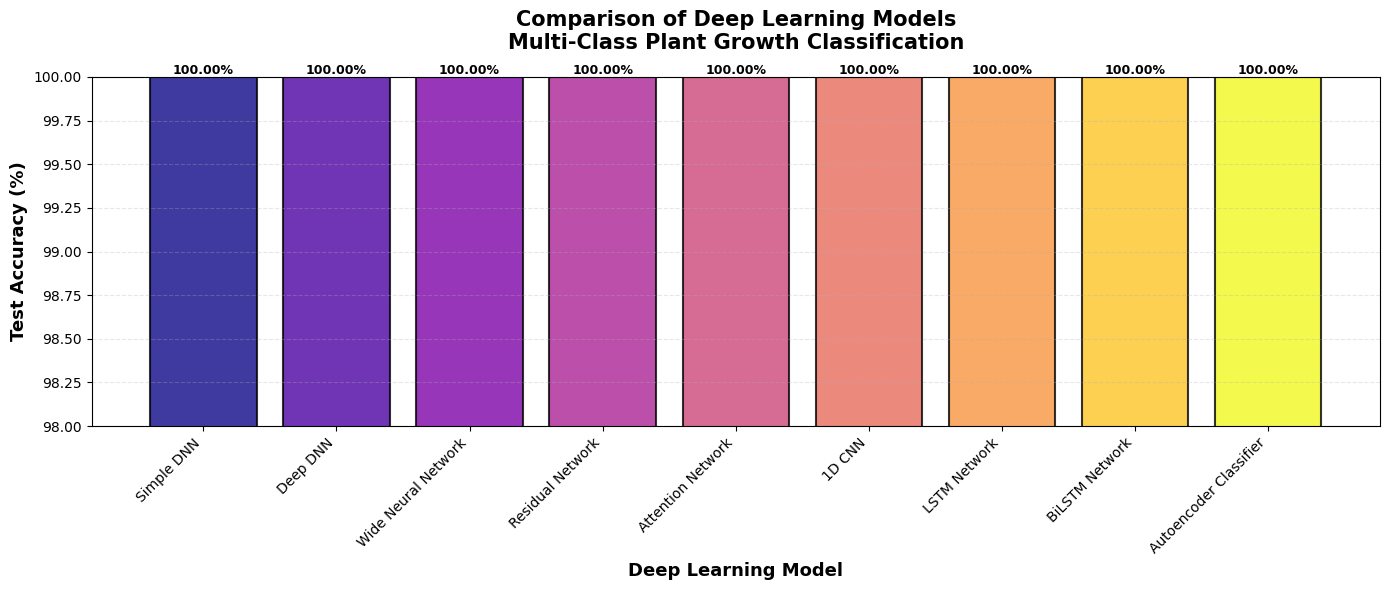

✓ Saved: dl_model_comparison.png


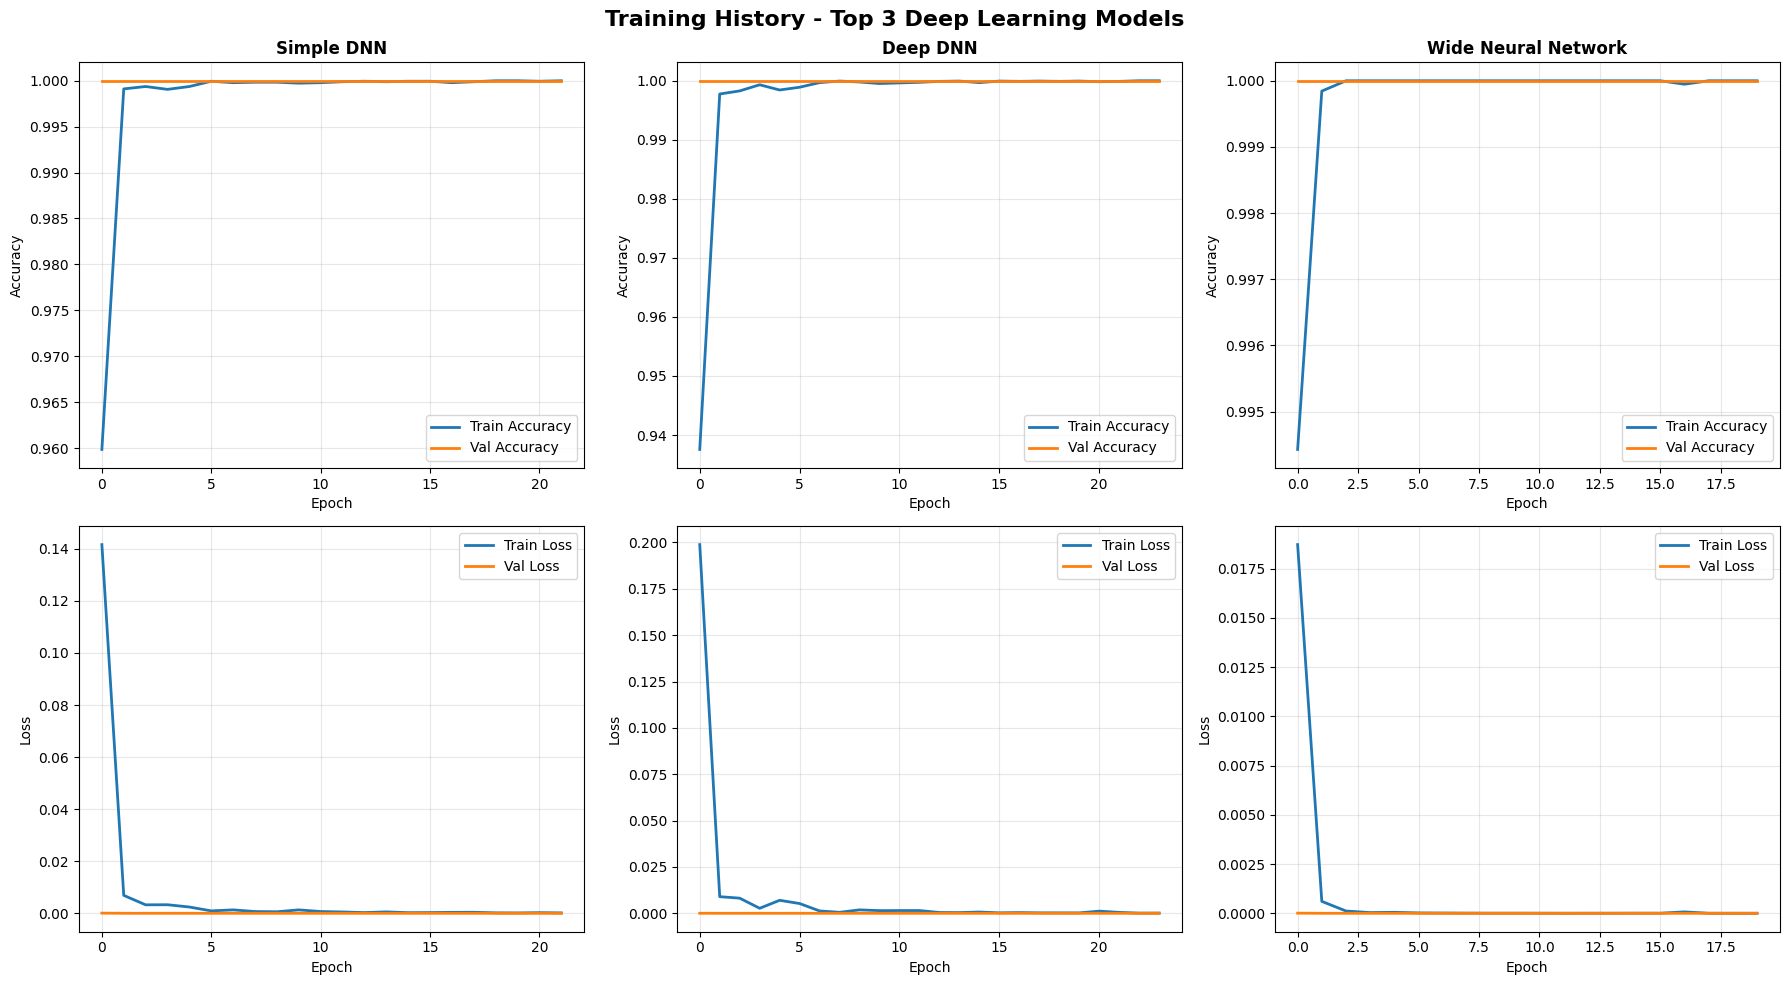

✓ Saved: dl_training_history.png


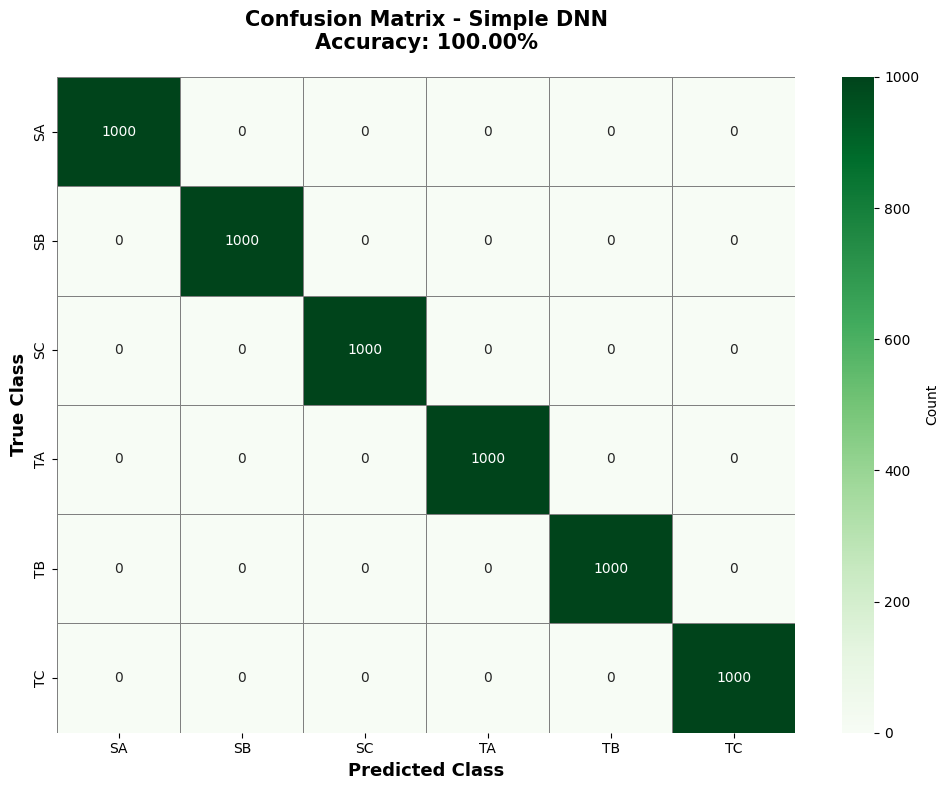

✓ Saved: dl_confusion_matrix_best.png


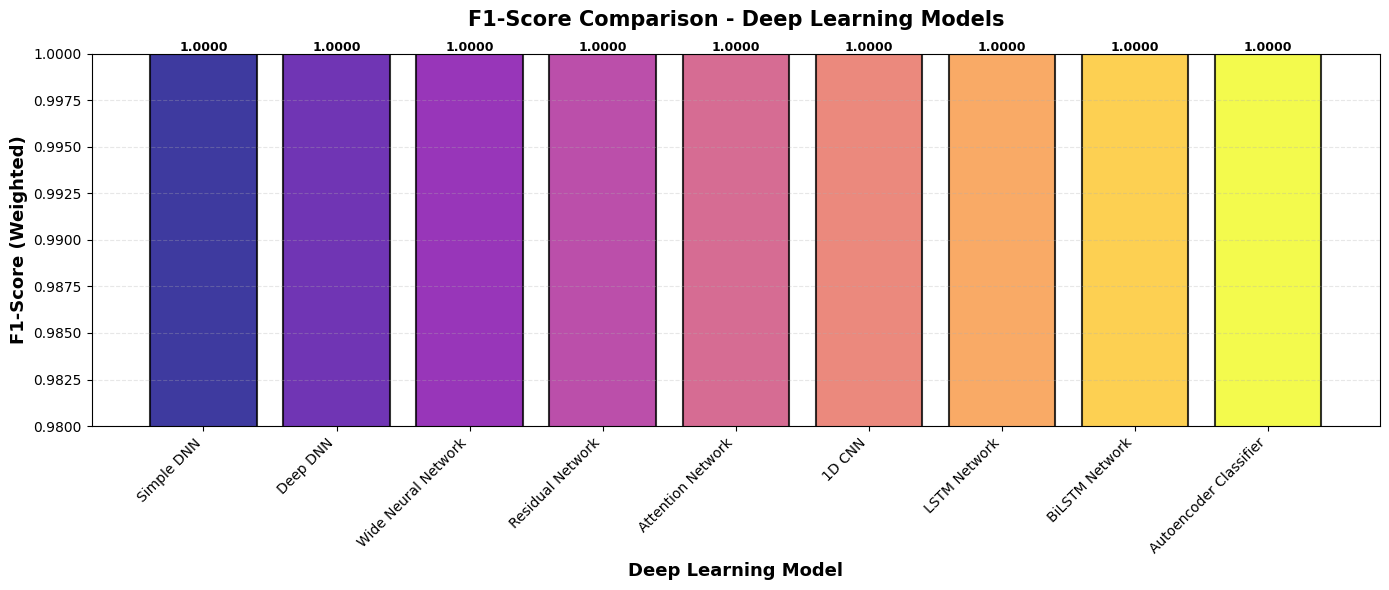

✓ Saved: dl_f1_score_comparison.png

DEEP LEARNING ANALYSIS COMPLETE!

Best Performing Model: Simple DNN
Best Test Accuracy: 100.00%
Best F1-Score: 1.0000

FILES GENERATED:
1. deep_learning_results_summary.csv
2. dl_model_comparison.png
3. dl_training_history.png
4. dl_confusion_matrix_best.png
5. dl_f1_score_comparison.png

All deep learning models trained and evaluated successfully!


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# ============================================================================
# STEP 1: Load Dataset
# ============================================================================
print("="*80)
print("LOADING DATASET")
print("="*80)

# Load the dataset
DATA = "/content/Greenhouse Plant Growth Metrics.csv"
df = pd.read_csv(DATA)
print(f"\nDataset loaded successfully from: {DATA}")

print("\n" + "="*80)
print("DATASET OVERVIEW")
print("="*80)
print(f"\nDataset Shape: {df.shape}")
print(f"\nColumn Names:\n{df.columns.tolist()}")
print(f"\nFirst 5 rows:\n{df.head()}")
print(f"\nClass Distribution:\n{df['Class'].value_counts()}")
print(f"\nBasic Statistics:\n{df.describe()}")

# Check for missing values
print(f"\nMissing Values:\n{df.isnull().sum()}")

# ============================================================================
# STEP 2: Data Preprocessing
# ============================================================================
print("\n" + "="*80)
print("DATA PREPROCESSING")
print("="*80)

# Separate features and target
X = df.drop(['Random', 'Class'], axis=1)
y = df['Class']

print(f"\nFeatures selected: {X.columns.tolist()}")
print(f"Target variable: Class")
print(f"Classes: {y.unique()}")

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
num_classes = len(le.classes_)

print(f"\nClass Encoding:")
for i, class_name in enumerate(le.classes_):
    print(f"  {class_name} -> {i}")

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to one-hot encoding for neural networks
y_train_categorical = to_categorical(y_train, num_classes)
y_test_categorical = to_categorical(y_test, num_classes)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Number of features: {X_train.shape[1]}")
print(f"Number of classes: {num_classes}")

input_dim = X_train_scaled.shape[1]

# ============================================================================
# STEP 3: Define Deep Learning Architectures
# ============================================================================
print("\n" + "="*80)
print("DEFINING DEEP LEARNING ARCHITECTURES")
print("="*80)

# Define Early Stopping and Model Checkpoint callbacks
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=0
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-7,
    verbose=0
)

# ============================================================================
# Model 1: Simple Deep Neural Network (DNN)
# ============================================================================
def create_simple_dnn():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(input_dim,)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation='softmax')
    ], name='Simple_DNN')

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# ============================================================================
# Model 2: Deep Neural Network with More Layers
# ============================================================================
def create_deep_dnn():
    model = models.Sequential([
        layers.Dense(256, activation='relu', input_shape=(input_dim,)),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(16, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ], name='Deep_DNN')

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# ============================================================================
# Model 3: Wide Neural Network
# ============================================================================
def create_wide_nn():
    model = models.Sequential([
        layers.Dense(512, activation='relu', input_shape=(input_dim,)),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation='softmax')
    ], name='Wide_NN')

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# ============================================================================
# Model 4: Residual-like Network with Skip Connections
# ============================================================================
def create_residual_network():
    inputs = layers.Input(shape=(input_dim,))

    # First block
    x = layers.Dense(128, activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    # Second block with skip connection
    residual = layers.Dense(64)(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    x = layers.add([x, residual])
    x = layers.Activation('relu')(x)

    # Third block
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dropout(0.2)(x)

    # Output
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=inputs, outputs=outputs, name='Residual_Network')

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# ============================================================================
# Model 5: Attention-based Neural Network
# ============================================================================
def create_attention_network():
    inputs = layers.Input(shape=(input_dim,))

    # Feature extraction
    x = layers.Dense(128, activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    # Attention mechanism
    attention = layers.Dense(128, activation='softmax')(x)
    x = layers.multiply([x, attention])

    # Deep layers
    x = layers.Dense(64, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dropout(0.2)(x)

    # Output
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=inputs, outputs=outputs, name='Attention_Network')

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# ============================================================================
# Model 6: 1D Convolutional Neural Network
# ============================================================================
def create_1d_cnn():
    model = models.Sequential([
        layers.Reshape((input_dim, 1), input_shape=(input_dim,)),
        layers.Conv1D(64, kernel_size=3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(pool_size=2),
        layers.Dropout(0.3),
        layers.Conv1D(32, kernel_size=3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.GlobalMaxPooling1D(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ], name='1D_CNN')

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# ============================================================================
# Model 7: LSTM Network (treating features as sequence)
# ============================================================================
def create_lstm_network():
    model = models.Sequential([
        layers.Reshape((input_dim, 1), input_shape=(input_dim,)),
        layers.LSTM(64, return_sequences=True),
        layers.Dropout(0.3),
        layers.LSTM(32),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ], name='LSTM_Network')

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# ============================================================================
# Model 8: Bidirectional LSTM
# ============================================================================
def create_bilstm_network():
    model = models.Sequential([
        layers.Reshape((input_dim, 1), input_shape=(input_dim,)),
        layers.Bidirectional(layers.LSTM(64, return_sequences=True)),
        layers.Dropout(0.3),
        layers.Bidirectional(layers.LSTM(32)),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ], name='BiLSTM_Network')

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# ============================================================================
# Model 9: Autoencoder-based Classifier
# ============================================================================
def create_autoencoder_classifier():
    # Encoder
    inputs = layers.Input(shape=(input_dim,))
    encoded = layers.Dense(64, activation='relu')(inputs)
    encoded = layers.BatchNormalization()(encoded)
    encoded = layers.Dropout(0.3)(encoded)
    encoded = layers.Dense(32, activation='relu')(encoded)
    encoded = layers.BatchNormalization()(encoded)

    # Decoder path (not used for classification, but helps learning)
    decoded = layers.Dense(64, activation='relu')(encoded)
    decoded = layers.Dense(input_dim, activation='linear')(decoded)

    # Classifier path
    classifier = layers.Dense(64, activation='relu')(encoded)
    classifier = layers.Dropout(0.3)(classifier)
    classifier = layers.Dense(32, activation='relu')(classifier)
    classifier = layers.Dropout(0.2)(classifier)
    outputs = layers.Dense(num_classes, activation='softmax')(classifier)

    model = models.Model(inputs=inputs, outputs=outputs, name='Autoencoder_Classifier')

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# ============================================================================
# STEP 4: Train All Deep Learning Models
# ============================================================================
print("\n" + "="*80)
print("TRAINING DEEP LEARNING MODELS")
print("="*80)

models_dict = {
    'Simple DNN': create_simple_dnn,
    'Deep DNN': create_deep_dnn,
    'Wide Neural Network': create_wide_nn,
    'Residual Network': create_residual_network,
    'Attention Network': create_attention_network,
    '1D CNN': create_1d_cnn,
    'LSTM Network': create_lstm_network,
    'BiLSTM Network': create_bilstm_network,
    'Autoencoder Classifier': create_autoencoder_classifier
}

results = {}
histories = {}

for model_name, model_func in models_dict.items():
    print(f"\n{'-'*80}")
    print(f"Training {model_name}...")
    print(f"{'-'*80}")

    # Create model
    model = model_func()

    # Print model summary
    print(f"\nModel Architecture:")
    model.summary()

    # Train model
    history = model.fit(
        X_train_scaled, y_train_categorical,
        validation_split=0.2,
        epochs=100,
        batch_size=32,
        callbacks=[early_stopping, reduce_lr],
        verbose=0
    )

    # Predict
    y_pred_proba = model.predict(X_test_scaled, verbose=0)
    y_pred = np.argmax(y_pred_proba, axis=1)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    results[model_name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'y_pred': y_pred,
        'model': model,
        'history': history
    }

    histories[model_name] = history

    print(f"\nTest Accuracy: {accuracy*100:.2f}%")
    print(f"F1-Score (Weighted): {f1:.4f}")

    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion Matrix:")
    print(cm)

# ============================================================================
# STEP 5: Summary of Results
# ============================================================================
print("\n" + "="*80)
print("SUMMARY OF ALL DEEP LEARNING MODELS")
print("="*80)

summary_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Test Accuracy (%)': [results[k]['accuracy']*100 for k in results.keys()],
    'F1-Score': [results[k]['f1_score'] for k in results.keys()]
})

summary_df = summary_df.sort_values('Test Accuracy (%)', ascending=False)
print("\n", summary_df.to_string(index=False))

# Save summary to CSV
summary_df.to_csv('deep_learning_results_summary.csv', index=False)
print("\n✓ Results saved to: deep_learning_results_summary.csv")

# ============================================================================
# STEP 6: Visualizations
# ============================================================================
print("\n" + "="*80)
print("GENERATING VISUALIZATIONS")
print("="*80)

# 1. Accuracy Comparison Bar Plot
plt.figure(figsize=(14, 6))
models_list = summary_df['Model']
accuracies = summary_df['Test Accuracy (%)']
colors = plt.cm.plasma(np.linspace(0, 1, len(models_list)))

bars = plt.bar(models_list, accuracies, color=colors, edgecolor='black', alpha=0.8, linewidth=1.5)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%',
             ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.xlabel('Deep Learning Model', fontsize=13, fontweight='bold')
plt.ylabel('Test Accuracy (%)', fontsize=13, fontweight='bold')
plt.title('Comparison of Deep Learning Models\nMulti-Class Plant Growth Classification',
          fontsize=15, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylim([min(accuracies)-2, 100])
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('dl_model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: dl_model_comparison.png")

# 2. Training History - Accuracy and Loss for Top 3 Models
top_3_models = summary_df.head(3)['Model'].tolist()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Training History - Top 3 Deep Learning Models', fontsize=16, fontweight='bold')

for idx, model_name in enumerate(top_3_models):
    history = histories[model_name]

    # Accuracy plot
    axes[0, idx].plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
    axes[0, idx].plot(history.history['val_accuracy'], label='Val Accuracy', linewidth=2)
    axes[0, idx].set_title(f'{model_name}', fontweight='bold')
    axes[0, idx].set_xlabel('Epoch')
    axes[0, idx].set_ylabel('Accuracy')
    axes[0, idx].legend()
    axes[0, idx].grid(alpha=0.3)

    # Loss plot
    axes[1, idx].plot(history.history['loss'], label='Train Loss', linewidth=2)
    axes[1, idx].plot(history.history['val_loss'], label='Val Loss', linewidth=2)
    axes[1, idx].set_xlabel('Epoch')
    axes[1, idx].set_ylabel('Loss')
    axes[1, idx].legend()
    axes[1, idx].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('dl_training_history.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: dl_training_history.png")

# 3. Confusion Matrix for Best Model
best_model_name = summary_df.iloc[0]['Model']
best_pred = results[best_model_name]['y_pred']

plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, best_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_, yticklabels=le.classes_,
            cbar_kws={'label': 'Count'}, linewidths=0.5, linecolor='gray')
plt.xlabel('Predicted Class', fontsize=13, fontweight='bold')
plt.ylabel('True Class', fontsize=13, fontweight='bold')
plt.title(f'Confusion Matrix - {best_model_name}\nAccuracy: {results[best_model_name]["accuracy"]*100:.2f}%',
          fontsize=15, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('dl_confusion_matrix_best.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: dl_confusion_matrix_best.png")

# 4. F1-Score Comparison
plt.figure(figsize=(14, 6))
f1_scores = summary_df['F1-Score']
bars = plt.bar(models_list, f1_scores, color=colors, edgecolor='black', alpha=0.8, linewidth=1.5)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.xlabel('Deep Learning Model', fontsize=13, fontweight='bold')
plt.ylabel('F1-Score (Weighted)', fontsize=13, fontweight='bold')
plt.title('F1-Score Comparison - Deep Learning Models', fontsize=15, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylim([min(f1_scores)-0.02, 1.0])
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('dl_f1_score_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: dl_f1_score_comparison.png")

# ============================================================================
# STEP 7: Final Summary
# ============================================================================
print("\n" + "="*80)
print("DEEP LEARNING ANALYSIS COMPLETE!")
print("="*80)
print(f"\nBest Performing Model: {best_model_name}")
print(f"Best Test Accuracy: {results[best_model_name]['accuracy']*100:.2f}%")
print(f"Best F1-Score: {results[best_model_name]['f1_score']:.4f}")

print("\n" + "="*80)
print("FILES GENERATED:")
print("="*80)
print("1. deep_learning_results_summary.csv")
print("2. dl_model_comparison.png")
print("3. dl_training_history.png")
print("4. dl_confusion_matrix_best.png")
print("5. dl_f1_score_comparison.png")

print("\n" + "="*80)
print("All deep learning models trained and evaluated successfully!")
print("="*80)

Ensemble

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    ExtraTreesClassifier,
    BaggingClassifier,
    VotingClassifier,
    StackingClassifier
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# ============================================================================
# STEP 1: Load Dataset
# ============================================================================
print("="*80)
print("LOADING DATASET")
print("="*80)

# Load the dataset
DATA = "/content/Greenhouse Plant Growth Metrics.csv"
df = pd.read_csv(DATA)
print(f"\nDataset loaded successfully from: {DATA}")

print("\n" + "="*80)
print("DATASET OVERVIEW")
print("="*80)
print(f"\nDataset Shape: {df.shape}")
print(f"\nColumn Names:\n{df.columns.tolist()}")
print(f"\nFirst 5 rows:\n{df.head()}")
print(f"\nClass Distribution:\n{df['Class'].value_counts()}")
print(f"\nBasic Statistics:\n{df.describe()}")

# Check for missing values
print(f"\nMissing Values:\n{df.isnull().sum()}")

# ============================================================================
# STEP 2: Data Preprocessing
# ============================================================================
print("\n" + "="*80)
print("DATA PREPROCESSING")
print("="*80)

# Separate features and target
X = df.drop(['Random', 'Class'], axis=1)
y = df['Class']

print(f"\nFeatures selected: {X.columns.tolist()}")
print(f"Target variable: Class")
print(f"Classes: {y.unique()}")

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print(f"\nClass Encoding:")
for i, class_name in enumerate(le.classes_):
    print(f"  {class_name} -> {i}")

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Number of features: {X_train.shape[1]}")
print(f"Number of classes: {len(np.unique(y_encoded))}")

# ============================================================================
# STEP 3: Define Ensemble Learning Algorithms
# ============================================================================
print("\n" + "="*80)
print("DEFINING ENSEMBLE LEARNING ALGORITHMS")
print("="*80)

# Base models for ensemble methods
base_models = {
    'Random Forest': RandomForestClassifier(
        n_estimators=200,
        max_depth=20,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1
    ),
    'Extra Trees': ExtraTreesClassifier(
        n_estimators=200,
        max_depth=20,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=150,
        max_depth=8,
        learning_rate=0.1,
        subsample=0.8,
        random_state=42
    ),
    'XGBoost': xgb.XGBClassifier(
        n_estimators=200,
        max_depth=8,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        eval_metric='mlogloss',
        use_label_encoder=False
    ),
    'LightGBM': lgb.LGBMClassifier(
        n_estimators=200,
        max_depth=8,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        verbose=-1
    ),
    'CatBoost': CatBoostClassifier(
        iterations=200,
        depth=8,
        learning_rate=0.1,
        random_state=42,
        verbose=0
    ),
    'AdaBoost': AdaBoostClassifier(
        n_estimators=100,
        learning_rate=1.0,
        random_state=42
    ),
    'Bagging (Decision Tree)': BaggingClassifier(
        estimator=DecisionTreeClassifier(max_depth=15, random_state=42),
        n_estimators=100,
        max_samples=0.8,
        max_features=0.8,
        random_state=42,
        n_jobs=-1
    ),
    'Bagging (SVM)': BaggingClassifier(
        estimator=SVC(kernel='rbf', C=10, gamma='scale', random_state=42),
        n_estimators=50,
        max_samples=0.8,
        random_state=42,
        n_jobs=-1
    )
}

# ============================================================================
# Advanced Ensemble: Voting Classifier
# ============================================================================
voting_estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)),
    ('xgb', xgb.XGBClassifier(n_estimators=100, random_state=42, eval_metric='mlogloss', use_label_encoder=False)),
    ('lgb', lgb.LGBMClassifier(n_estimators=100, random_state=42, verbose=-1)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
]

base_models['Voting Classifier (Hard)'] = VotingClassifier(
    estimators=voting_estimators,
    voting='hard',
    n_jobs=-1
)

base_models['Voting Classifier (Soft)'] = VotingClassifier(
    estimators=voting_estimators,
    voting='soft',
    n_jobs=-1
)

# ============================================================================
# Advanced Ensemble: Stacking Classifier
# ============================================================================
stacking_estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)),
    ('xgb', xgb.XGBClassifier(n_estimators=100, random_state=42, eval_metric='mlogloss', use_label_encoder=False)),
    ('lgb', lgb.LGBMClassifier(n_estimators=100, random_state=42, verbose=-1)),
    ('et', ExtraTreesClassifier(n_estimators=100, random_state=42, n_jobs=-1))
]

base_models['Stacking (LR Meta)'] = StackingClassifier(
    estimators=stacking_estimators,
    final_estimator=LogisticRegression(max_iter=1000, random_state=42),
    n_jobs=-1
)

base_models['Stacking (RF Meta)'] = StackingClassifier(
    estimators=stacking_estimators,
    final_estimator=RandomForestClassifier(n_estimators=50, random_state=42),
    n_jobs=-1
)

base_models['Stacking (XGB Meta)'] = StackingClassifier(
    estimators=stacking_estimators,
    final_estimator=xgb.XGBClassifier(n_estimators=50, random_state=42, eval_metric='mlogloss', use_label_encoder=False),
    n_jobs=-1
)

# ============================================================================
# STEP 4: Train All Ensemble Models
# ============================================================================
print("\n" + "="*80)
print("TRAINING ENSEMBLE LEARNING ALGORITHMS")
print("="*80)

results = {}

for name, model in base_models.items():
    print(f"\n{'-'*80}")
    print(f"Training {name}...")
    print(f"{'-'*80}")

    # Train
    model.fit(X_train_scaled, y_train)

    # Predict
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Cross-validation score (5-fold)
    try:
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, n_jobs=-1)
        cv_mean = cv_scores.mean()
        cv_std = cv_scores.std()
    except:
        cv_mean = accuracy
        cv_std = 0.0

    results[name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'precision': precision,
        'recall': recall,
        'cv_mean': cv_mean,
        'cv_std': cv_std,
        'y_pred': y_pred,
        'model': model
    }

    print(f"\nTest Accuracy: {accuracy*100:.2f}%")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Cross-Validation Accuracy: {cv_mean*100:.2f}% (+/- {cv_std*100:.2f}%)")

    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion Matrix:")
    print(cm)

# ============================================================================
# STEP 5: Summary of Results
# ============================================================================
print("\n" + "="*80)
print("SUMMARY OF ALL ENSEMBLE ALGORITHMS")
print("="*80)

summary_df = pd.DataFrame({
    'Algorithm': list(results.keys()),
    'Test Accuracy (%)': [results[k]['accuracy']*100 for k in results.keys()],
    'Precision': [results[k]['precision'] for k in results.keys()],
    'Recall': [results[k]['recall'] for k in results.keys()],
    'F1-Score': [results[k]['f1_score'] for k in results.keys()],
    'CV Mean (%)': [results[k]['cv_mean']*100 for k in results.keys()],
    'CV Std (%)': [results[k]['cv_std']*100 for k in results.keys()]
})

summary_df = summary_df.sort_values('Test Accuracy (%)', ascending=False)
print("\n", summary_df.to_string(index=False))

# Save summary to CSV
summary_df.to_csv('ensemble_learning_results_summary.csv', index=False)
print("\n✓ Results saved to: ensemble_learning_results_summary.csv")

# ============================================================================
# STEP 6: Visualizations
# ============================================================================
print("\n" + "="*80)
print("GENERATING VISUALIZATIONS")
print("="*80)

# 1. Accuracy Comparison Bar Plot
plt.figure(figsize=(16, 7))
algorithms = summary_df['Algorithm']
accuracies = summary_df['Test Accuracy (%)']
colors = plt.cm.viridis(np.linspace(0, 1, len(algorithms)))

bars = plt.bar(range(len(algorithms)), accuracies, color=colors, edgecolor='black', alpha=0.8, linewidth=1.5)

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%',
             ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.xticks(range(len(algorithms)), algorithms, rotation=45, ha='right', fontsize=10)
plt.xlabel('Ensemble Algorithm', fontsize=13, fontweight='bold')
plt.ylabel('Test Accuracy (%)', fontsize=13, fontweight='bold')
plt.title('Comparison of Ensemble Learning Algorithms\nMulti-Class Plant Growth Classification',
          fontsize=15, fontweight='bold', pad=20)
plt.ylim([min(accuracies)-2, 100])
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('ensemble_algorithm_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: ensemble_algorithm_comparison.png")

# 2. Metrics Comparison (Accuracy, Precision, Recall, F1-Score) for Top 5
top_5_df = summary_df.head(5)
metrics_data = {
    'Accuracy': top_5_df['Test Accuracy (%)'].values / 100,
    'Precision': top_5_df['Precision'].values,
    'Recall': top_5_df['Recall'].values,
    'F1-Score': top_5_df['F1-Score'].values
}

x = np.arange(len(top_5_df))
width = 0.2

fig, ax = plt.subplots(figsize=(14, 7))
multiplier = 0

for metric, values in metrics_data.items():
    offset = width * multiplier
    bars = ax.bar(x + offset, values, width, label=metric, alpha=0.8, edgecolor='black', linewidth=1.2)

    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=7, fontweight='bold')

    multiplier += 1

ax.set_xlabel('Algorithm', fontsize=13, fontweight='bold')
ax.set_ylabel('Score', fontsize=13, fontweight='bold')
ax.set_title('Performance Metrics Comparison - Top 5 Ensemble Algorithms', fontsize=15, fontweight='bold', pad=20)
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(top_5_df['Algorithm'], rotation=45, ha='right', fontsize=10)
ax.legend(loc='lower right', fontsize=11)
ax.set_ylim([0.9, 1.0])
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('ensemble_metrics_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: ensemble_metrics_comparison.png")

# 3. Confusion Matrix for Best Model
best_algo = summary_df.iloc[0]['Algorithm']
best_pred = results[best_algo]['y_pred']

plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, best_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=le.classes_, yticklabels=le.classes_,
            cbar_kws={'label': 'Count'}, linewidths=0.5, linecolor='gray')
plt.xlabel('Predicted Class', fontsize=13, fontweight='bold')
plt.ylabel('True Class', fontsize=13, fontweight='bold')
plt.title(f'Confusion Matrix - {best_algo}\nAccuracy: {results[best_algo]["accuracy"]*100:.2f}%',
          fontsize=15, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('ensemble_confusion_matrix_best.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: ensemble_confusion_matrix_best.png")

# 4. Confusion Matrices for Top 4 Models
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
top_4_algos = summary_df.head(4)['Algorithm'].tolist()

for idx, algo in enumerate(top_4_algos):
    row = idx // 2
    col = idx % 2
    cm = confusion_matrix(y_test, results[algo]['y_pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='RdYlGn', ax=axes[row, col],
                xticklabels=le.classes_, yticklabels=le.classes_,
                cbar_kws={'label': 'Count'}, linewidths=0.5)
    axes[row, col].set_xlabel('Predicted', fontweight='bold', fontsize=11)
    axes[row, col].set_ylabel('True', fontweight='bold', fontsize=11)
    axes[row, col].set_title(f'{algo}\nAcc: {results[algo]["accuracy"]*100:.2f}% | F1: {results[algo]["f1_score"]:.4f}',
                             fontweight='bold', fontsize=12)

plt.tight_layout()
plt.savefig('ensemble_top4_confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: ensemble_top4_confusion_matrices.png")

# 5. Cross-Validation Scores with Error Bars
plt.figure(figsize=(16, 7))
cv_means = summary_df['CV Mean (%)']
cv_stds = summary_df['CV Std (%)']

plt.errorbar(range(len(algorithms)), cv_means, yerr=cv_stds,
             fmt='o-', capsize=5, capthick=2, markersize=8,
             linewidth=2, color='darkgreen', ecolor='red',
             markerfacecolor='lightgreen', markeredgecolor='darkgreen', markeredgewidth=2)

plt.xticks(range(len(algorithms)), algorithms, rotation=45, ha='right', fontsize=10)
plt.xlabel('Algorithm', fontsize=13, fontweight='bold')
plt.ylabel('Cross-Validation Accuracy (%)', fontsize=13, fontweight='bold')
plt.title('Cross-Validation Performance (5-Fold CV) - Ensemble Algorithms',
          fontsize=15, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('ensemble_cv_scores_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: ensemble_cv_scores_comparison.png")

# 6. Feature Importance Comparison (Top 3 Tree-based Models)
tree_models = ['Random Forest', 'Extra Trees', 'XGBoost']
available_tree_models = [m for m in tree_models if m in results]

if len(available_tree_models) >= 2:
    fig, axes = plt.subplots(1, len(available_tree_models[:3]), figsize=(18, 6))
    if len(available_tree_models) == 1:
        axes = [axes]

    for idx, model_name in enumerate(available_tree_models[:3]):
        model = results[model_name]['model']

        if hasattr(model, 'feature_importances_'):
            importance = model.feature_importances_
        elif hasattr(model, 'get_score'):
            importance_dict = model.get_score(importance_type='weight')
            importance = np.array([importance_dict.get(f'f{i}', 0) for i in range(len(X.columns))])
        else:
            continue

        feature_importance = pd.DataFrame({
            'Feature': X.columns,
            'Importance': importance
        }).sort_values('Importance', ascending=True)

        axes[idx].barh(feature_importance['Feature'], feature_importance['Importance'],
                      color='forestgreen', edgecolor='black', alpha=0.8, linewidth=1.2)
        axes[idx].set_xlabel('Importance', fontweight='bold', fontsize=11)
        axes[idx].set_ylabel('Feature', fontweight='bold', fontsize=11)
        axes[idx].set_title(f'{model_name}\nFeature Importance', fontweight='bold', fontsize=12)
        axes[idx].grid(axis='x', alpha=0.3, linestyle='--')

    plt.tight_layout()
    plt.savefig('ensemble_feature_importance_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Saved: ensemble_feature_importance_comparison.png")

# 7. Algorithm Category Performance (Boosting vs Bagging vs Stacking vs Voting)
categories = {
    'Boosting': ['Gradient Boosting', 'XGBoost', 'LightGBM', 'CatBoost', 'AdaBoost'],
    'Bagging': ['Random Forest', 'Extra Trees', 'Bagging (Decision Tree)', 'Bagging (SVM)'],
    'Stacking': ['Stacking (LR Meta)', 'Stacking (RF Meta)', 'Stacking (XGB Meta)'],
    'Voting': ['Voting Classifier (Hard)', 'Voting Classifier (Soft)']
}

category_scores = {}
for category, models in categories.items():
    scores = [results[m]['accuracy']*100 for m in models if m in results]
    if scores:
        category_scores[category] = {
            'mean': np.mean(scores),
            'max': np.max(scores),
            'min': np.min(scores)
        }

if category_scores:
    fig, ax = plt.subplots(figsize=(12, 7))
    categories_list = list(category_scores.keys())
    means = [category_scores[c]['mean'] for c in categories_list]
    maxs = [category_scores[c]['max'] for c in categories_list]
    mins = [category_scores[c]['min'] for c in categories_list]

    x = np.arange(len(categories_list))
    width = 0.25

    bars1 = ax.bar(x - width, mins, width, label='Min', alpha=0.8, color='lightcoral', edgecolor='black')
    bars2 = ax.bar(x, means, width, label='Mean', alpha=0.8, color='skyblue', edgecolor='black')
    bars3 = ax.bar(x + width, maxs, width, label='Max', alpha=0.8, color='lightgreen', edgecolor='black')

    # Add value labels
    for bars in [bars1, bars2, bars3]:
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.1f}%',
                    ha='center', va='bottom', fontsize=9, fontweight='bold')

    ax.set_xlabel('Ensemble Category', fontsize=13, fontweight='bold')
    ax.set_ylabel('Accuracy (%)', fontsize=13, fontweight='bold')
    ax.set_title('Performance Comparison by Ensemble Category', fontsize=15, fontweight='bold', pad=20)
    ax.set_xticks(x)
    ax.set_xticklabels(categories_list, fontsize=11)
    ax.legend(fontsize=11)
    ax.grid(axis='y', alpha=0.3, linestyle='--')

    plt.tight_layout()
    plt.savefig('ensemble_category_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Saved: ensemble_category_comparison.png")

# ============================================================================
# STEP 7: Final Summary
# ============================================================================
print("\n" + "="*80)
print("ENSEMBLE LEARNING ANALYSIS COMPLETE!")
print("="*80)
print(f"\nBest Performing Algorithm: {best_algo}")
print(f"Best Test Accuracy: {results[best_algo]['accuracy']*100:.2f}%")
print(f"Best F1-Score: {results[best_algo]['f1_score']:.4f}")
print(f"Best Precision: {results[best_algo]['precision']:.4f}")
print(f"Best Recall: {results[best_algo]['recall']:.4f}")

print("\n" + "="*80)
print("FILES GENERATED:")
print("="*80)
print("1. ensemble_learning_results_summary.csv")
print("2. ensemble_algorithm_comparison.png")
print("3. ensemble_metrics_comparison.png")
print("4. ensemble_confusion_matrix_best.png")
print("5. ensemble_top4_confusion_matrices.png")
print("6. ensemble_cv_scores_comparison.png")
print("7. ensemble_feature_importance_comparison.png")
print("8. ensemble_category_comparison.png")

print("\n" + "="*80)
print("All ensemble learning models trained and evaluated successfully!")
print("="*80)

LOADING DATASET

Dataset loaded successfully from: /content/Greenhouse Plant Growth Metrics.csv

DATASET OVERVIEW

Dataset Shape: (30000, 14)

Column Names:
['Random', 'ACHP', 'PHR', 'AWWGV', 'ALAP', 'ANPL', 'ARD', 'ADWR', 'PDMVG', 'ARL', 'AWWR', 'ADWV', 'PDMRG', 'Class']

First 5 rows:
  Random       ACHP        PHR     AWWGV         ALAP      ANPL        ARD  \
0     R1  34.533468  54.566983  1.147449  1284.229549  4.999713  16.274918   
1     R1  34.489028  54.567692  1.149530  1284.247744  5.024259  16.269452   
2     R2  33.100405  67.067344  1.104647  1009.208996  5.007652  15.980760   
3     R1  34.498319  54.559049  1.137759  1284.227623  4.991501  16.276710   
4     R3  36.297008  45.588894  1.363205   981.470310  4.003682  16.979894   

       ADWR      PDMVG        ARL      AWWR      ADWV      PDMRG Class  
0  1.706810  18.399982  19.739037  2.949240  0.209251  57.633906    SA  
1  1.700930  18.398289  19.758836  2.943137  0.216154  57.633697    SA  
2  1.185391  19.398789  

In [3]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.1 MB/s eta 0:00:00
